In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spam-email/spam.csv


## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from stemming.porter2 import stem
import string
from wordcloud import WordCloud 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
import seaborn as sns
sns.set()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Importing Dataset

In [3]:
df = pd.read_csv("/kaggle/input/spam-email/spam.csv")

## Original Dataset Exploration

In [4]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
# countinng missing values
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [8]:
# counting duplicate values
df.duplicated().sum()

415

## Data Cleaning

In [9]:
df = df.drop_duplicates(keep="first")

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(5157, 2)

## Data Preprocessing

**Converting target varibale into 1 and 0**
- 0 -> ham
- 1 -> spam

In [12]:
label_encoder = LabelEncoder()
df["Category"] = label_encoder.fit_transform(df["Category"])
df

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [13]:
# num of characters
df["num_characters"] = df["Message"].apply(len)
df

,Category,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160
5568,0,Will ü b going to esplanade fr home?,36
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [14]:
# number of words
df["num_words"] = df["Message"].apply(lambda x: len(nltk.word_tokenize(x)))
df

,Category,Message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35
5568,0,Will ü b going to esplanade fr home?,36,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [15]:
# number of sentences
df["num_sentences"] = df["Message"].apply(lambda x: len(nltk.sent_tokenize(x)))
df

,Category,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4
5568,0,Will ü b going to esplanade fr home?,36,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


**Now, it is the most important part of data preprocessing. We, need to convert our all messages in a unified structure. All messages will go through below process,**
- Lower case
- Converting sentence to word
- Removing special characters
- Removing stop words and punctuation (stop words: your, he, her. punctuation: sad life)
- Stemming (example: dancing -> dance)

In [16]:
def msg_trans(msg):
    word_list = []
    msg = msg.lower() # lower case
    msg = nltk.word_tokenize(msg) # sntence to word
    
    for word in msg:
        if word.isalnum(): # removing special characters
            # removing stop words and punctuation
            if word not in stopwords.words("english") and word not in string.punctuation:
                word_list.append(stem(word)) # stemming words
    
    return " ".join(word_list)

In [17]:
print(df["Message"][100])
print(msg_trans(df["Message"][100]))

Please don't text me anymore. I have nothing else to say.
pleas text anymor noth els say


In [18]:
df["transformed_msg"] = df["Message"].apply(msg_trans)
df

,Category,Message,num_characters,num_words,num_sentences,transformed_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will ü b going to esplanade fr home?,36,9,1,ü b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


## Data Analysis

In [19]:
df["Category"].value_counts()

0    4516
1     641
Name: Category, dtype: int64

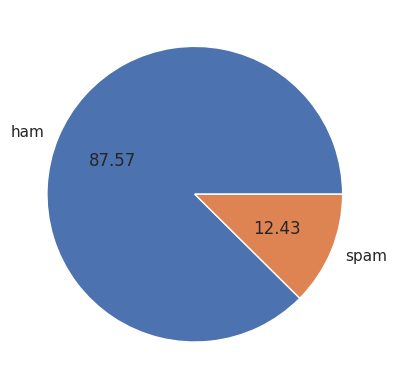

In [20]:
plt.pie(df["Category"].value_counts(), labels=["ham", "spam"], autopct="%0.2f")
plt.show()

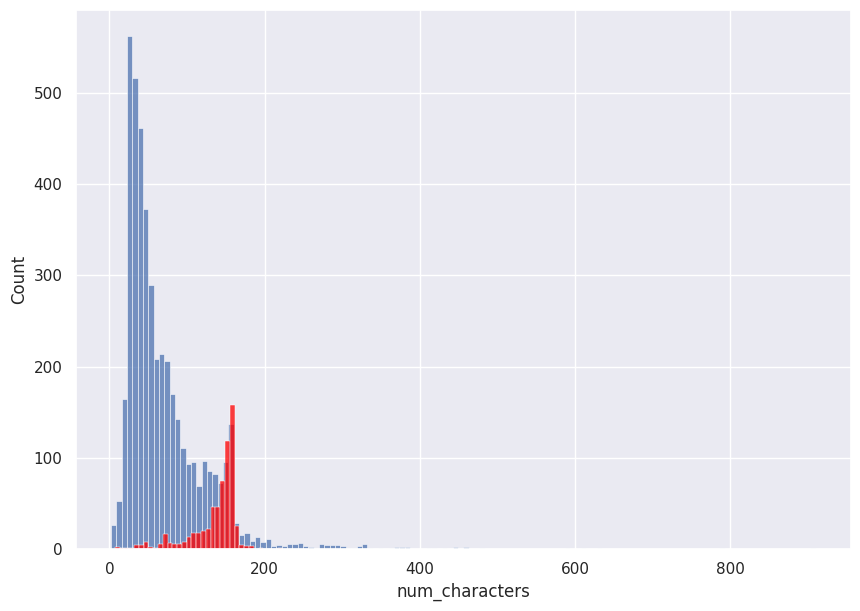

In [21]:
plt.figure(figsize=(10, 7))
sns.histplot(df[df["Category"] == 0]["num_characters"])
sns.histplot(df[df["Category"] == 1]["num_characters"], color="red")
plt.show()

**-> Imbalaced Dataset**

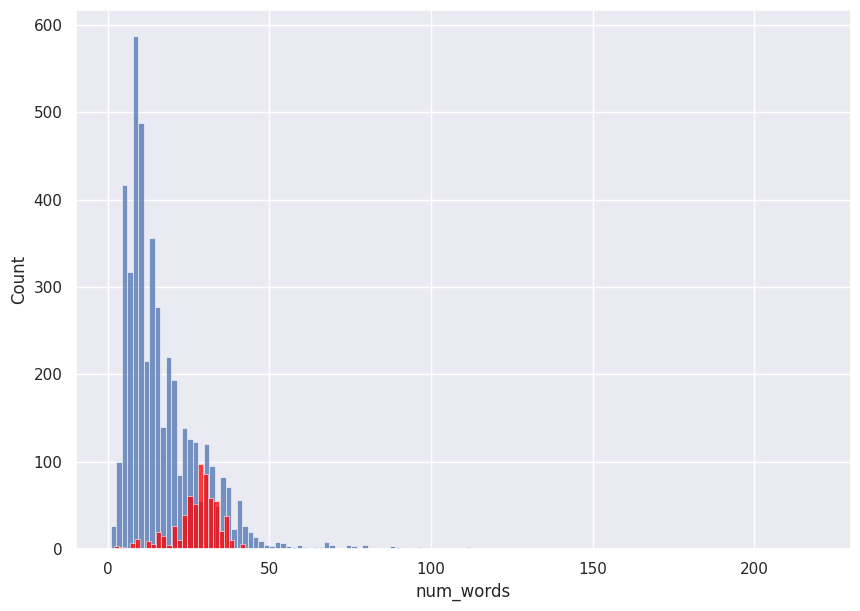

In [22]:
plt.figure(figsize=(10, 7))
sns.histplot(df[df["Category"] == 0]["num_words"])
sns.histplot(df[df["Category"] == 1]["num_words"], color="red")
plt.show()

**-> ham messages have many outliers. (becaus some message will have more words)**<br>
**-> most of the spam messages have too many words tahn usual messages**<br>


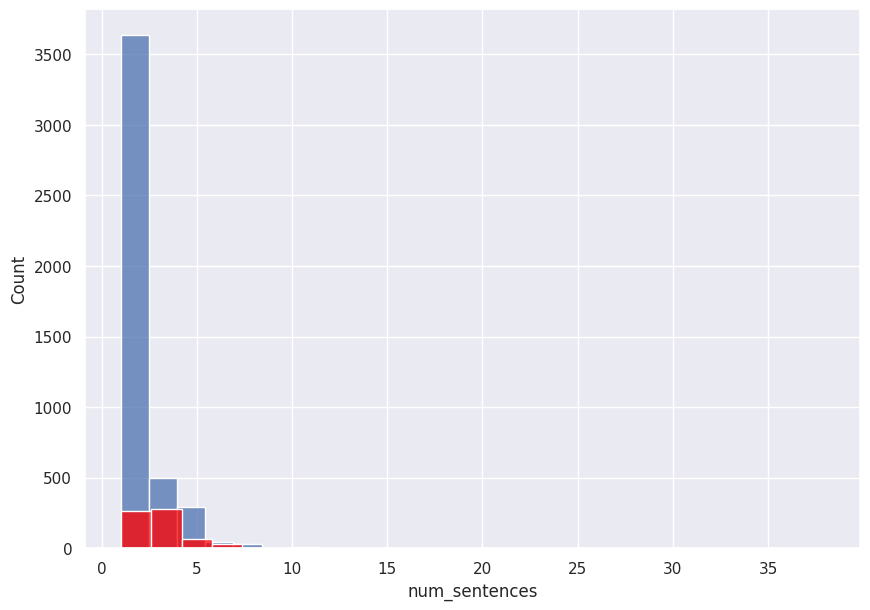

In [23]:
plt.figure(figsize=(10, 7))
sns.histplot(df[df["Category"] == 0]["num_sentences"], bins=25)
sns.histplot(df[df["Category"] == 1]["num_sentences"], color="red", bins=5)
plt.show()

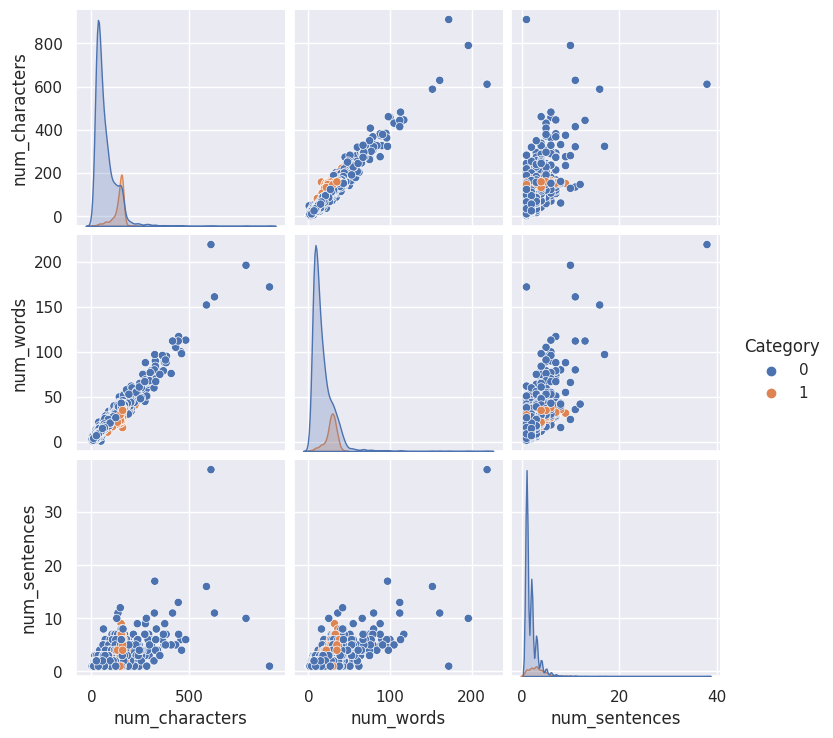

In [24]:
sns.pairplot(df, hue="Category")
plt.show()

/tmp/ipykernel_23/221941791.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


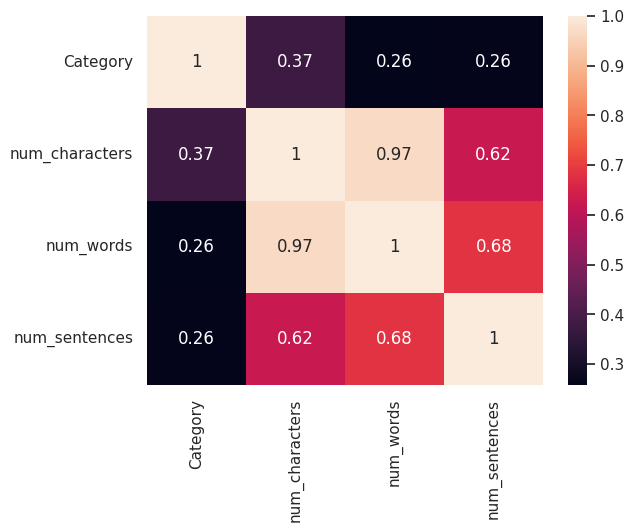

In [25]:
sns.heatmap(df.corr(), annot=True)
plt.show()

**-> As we can see from the heatmap number of characters in message increases the chance of spam message**

In [26]:
wc = WordCloud(min_font_size=5, background_color="white")

In [27]:
spam_wc = wc.generate(df[df["Category"] == 1]["transformed_msg"].str.cat(sep=" "))

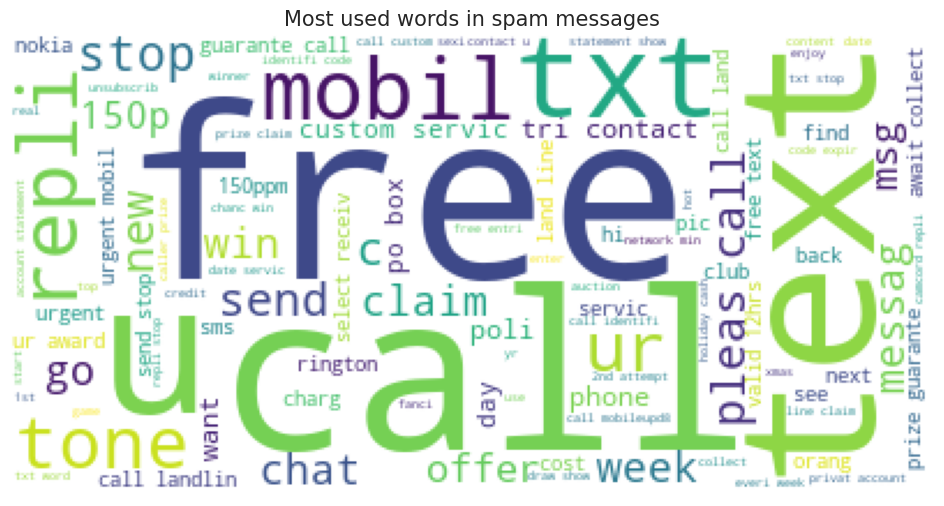

In [28]:
plt.figure(figsize=(17,6))
plt.imshow(spam_wc)
plt.grid(visible=False)
plt.axis("off")
plt.title("Most used words in spam messages", fontdict={"fontsize":15})
plt.show()

In [29]:
ham_wc = wc.generate(df[df["Category"] == 0]["transformed_msg"].str.cat(sep=" "))

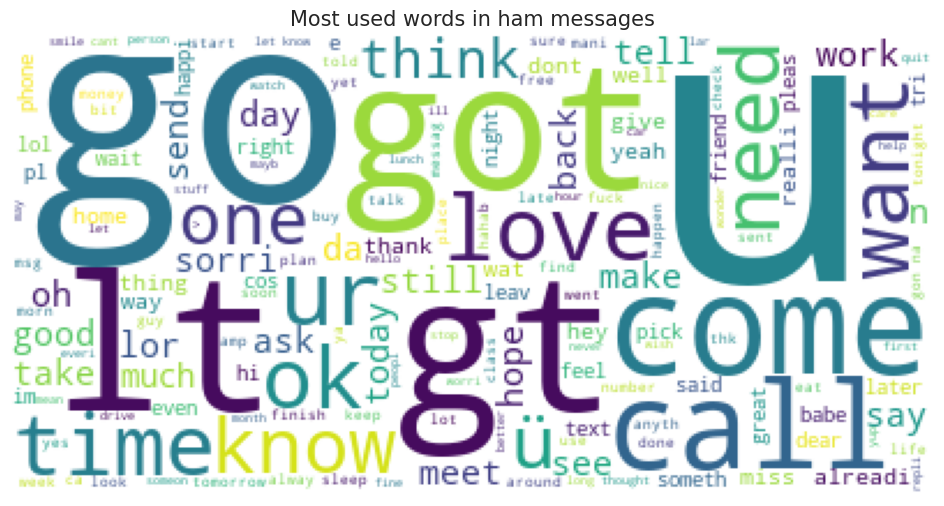

In [30]:
plt.figure(figsize=(17,6))
plt.imshow(spam_wc)
plt.grid(visible=False)
plt.axis("off")
plt.title("Most used words in ham messages", fontdict={"fontsize":15})
plt.show()

## Model

In [31]:
tfidf = TfidfVectorizer(max_features=3000)

In [32]:
X = tfidf.fit_transform(df["transformed_msg"]).toarray()
y = df["Category"].values

**Spliting Data**

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
mnb = MultinomialNB()

In [35]:
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9748062015503876
[[896   0]
 [ 26 110]]
1.0


**-> Here precision score is most important, <br>
-> because we do not want to marked a important message as Spam message.<br>
-> So, we want to reduce the false postive, which will increase precission.**